<a href="https://colab.research.google.com/github/human1abs/portfolio/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import beta

In [ ]:
np.random.seed(1)

In [ ]:
TRIALS = 2000
PROBABILITIES_BAND = [0.25, 0.35]

In [ ]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1
        self.N = 0

    def pull(self):
        while True:
            rand = np.random.random()
            if rand < self.p:
                return 1
            else:
                return 0

    def sample(self):
        return np.random.beta(self.a, self.b)

    def update(self, x):
        self.a += x
        self.b += 1 - x
        self.N += 1

In [ ]:
def plot(bandits, trial):
    x = np.linspace(0, 1, 2000)
    for bandit in bandits:
        y = beta.pdf(x, bandit.a, bandit.b)
        plt.plot(x, y, label=f'real_p = {bandit.p:.2f}, win_rate = {bandit.a - 1}/{bandit.N}')
    plt.title(f"A/B testing with initial Conjugate prior after {trial} trials")
    plt.legend()
    plt.show()

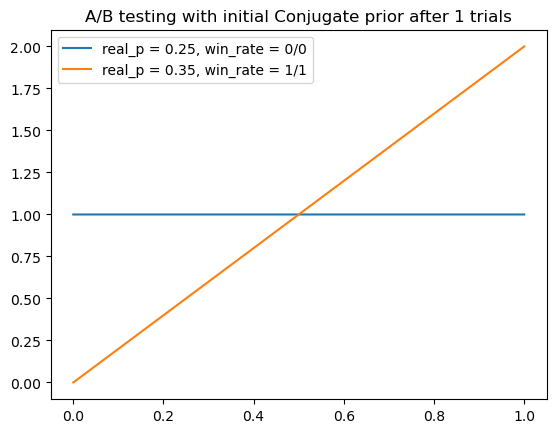

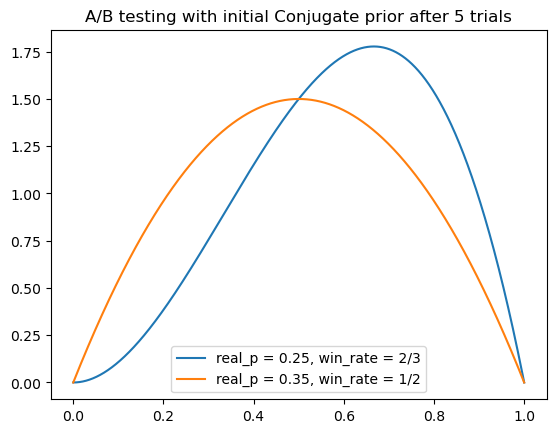

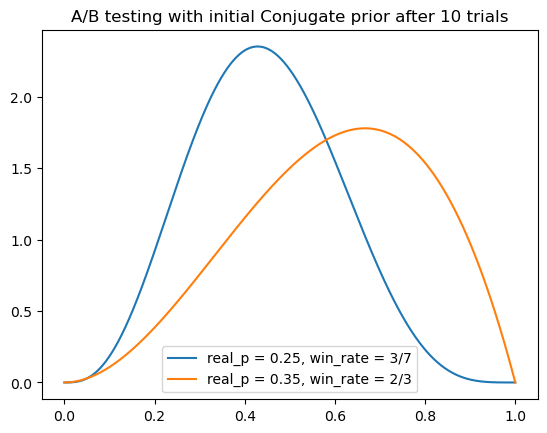

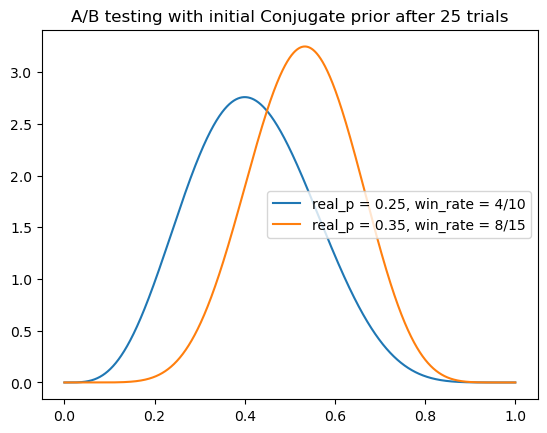

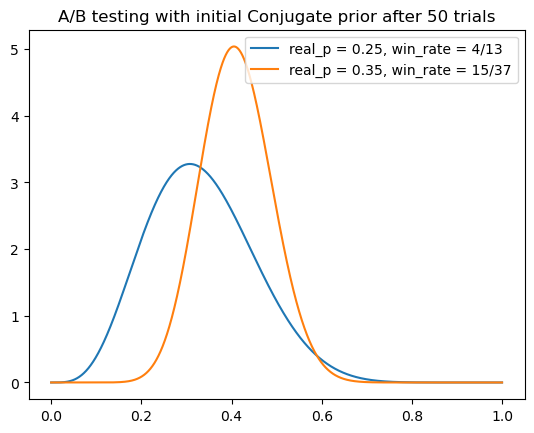

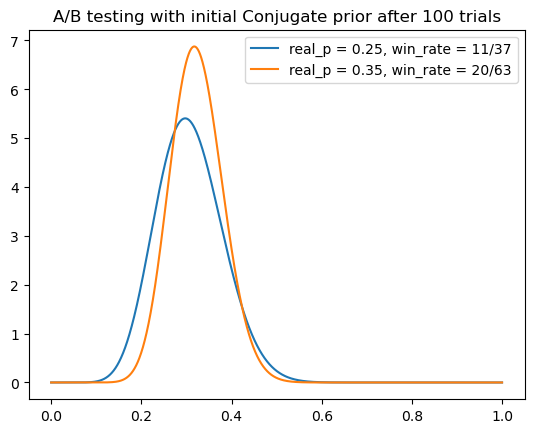

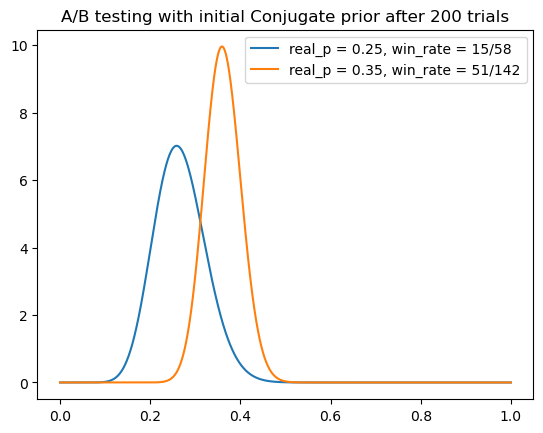

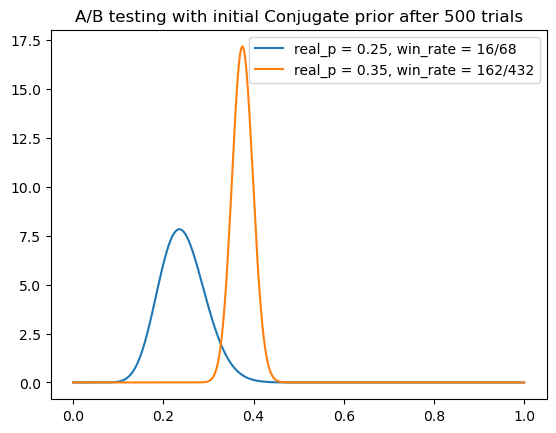

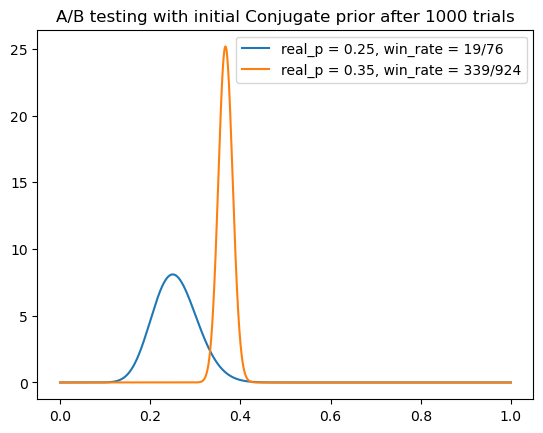

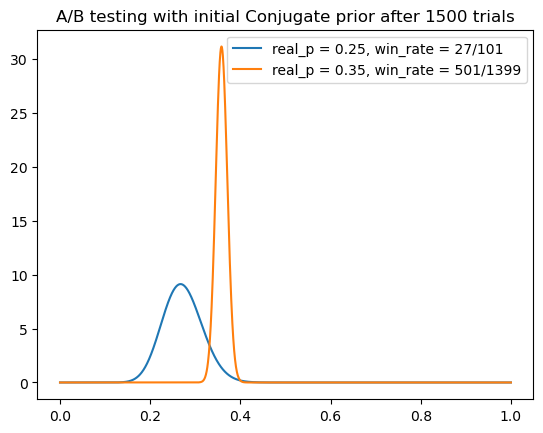

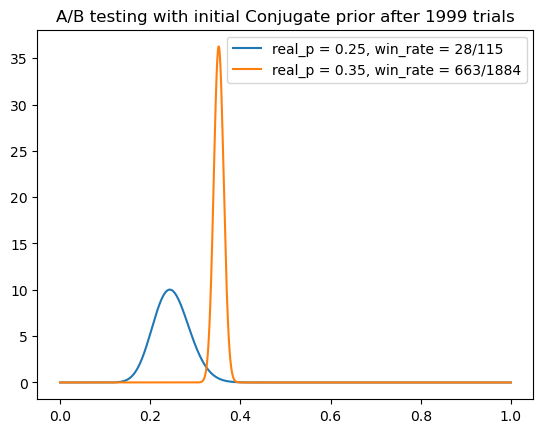

In [ ]:
bandits = [Bandit(p) for p in PROBABILITIES_BAND]
sample_points = [1, 5, 10, 25, 50, 100, 200, 500, 1000, 1500, 1999]
rewards = np.zeros(TRIALS)
for i in range(TRIALS):
    j = np.argmax([bandit.sample() for bandit in bandits])

    if i in sample_points:
        plot(bandits, i)

    x = bandits[j].pull()
    bandits[j].update(x)

In [ ]:
class JeffreysBandit:
    def __init__(self, p):
        self.p = p
        self.a = 0.5
        self.b = 0.5
        self.N = 0

    def pull(self):
        while True:
            rand = np.random.random()
            if rand < self.p:
                return 1
            else:
                return 0

    def sample(self):
        return np.random.beta(self.a, self.b)

    def update(self, x):
        self.a += x
        self.b += 1 - x
        self.N += 1

In [ ]:
def plot_jeffreys(bandits, trial):
    x = np.linspace(0, 1, 200)
    for bandit in bandits:
        y = beta.pdf(x, bandit.a, bandit.b)
        plt.plot(x, y, label=f'real_p = {bandit.p:.2f}, win_rate = {round(bandit.a - 0.5)}/{bandit.N}')
    plt.title(f"A/B testing with initial Jeffreys prior after {trial} trials")
    plt.legend()
    plt.show()

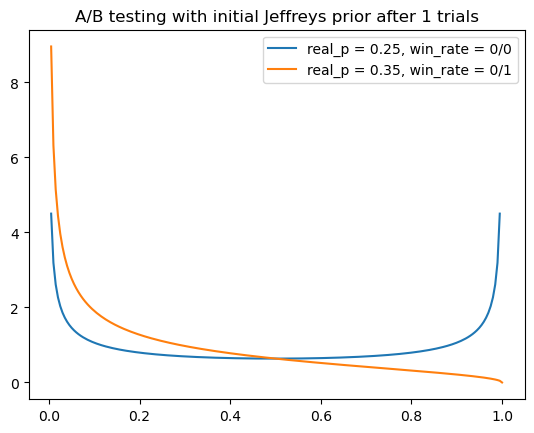

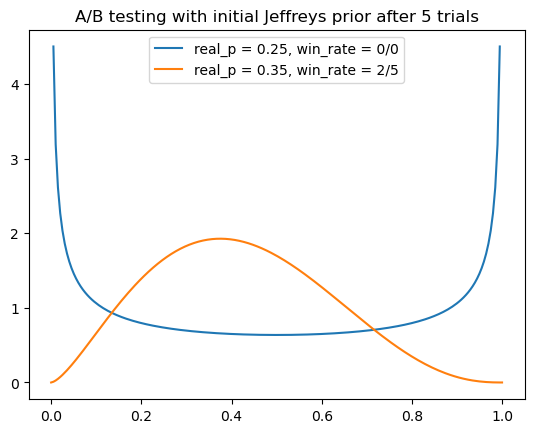

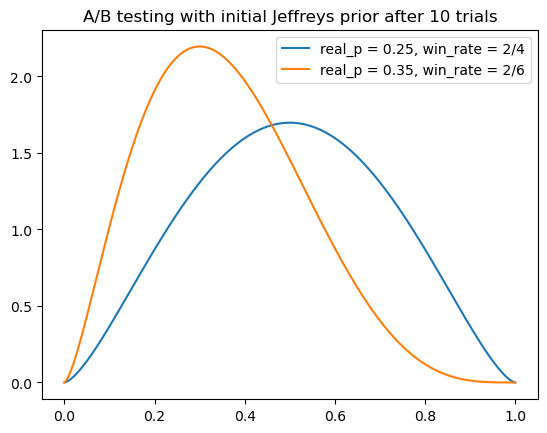

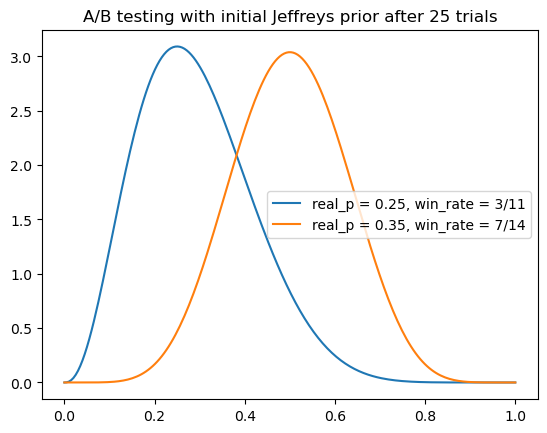

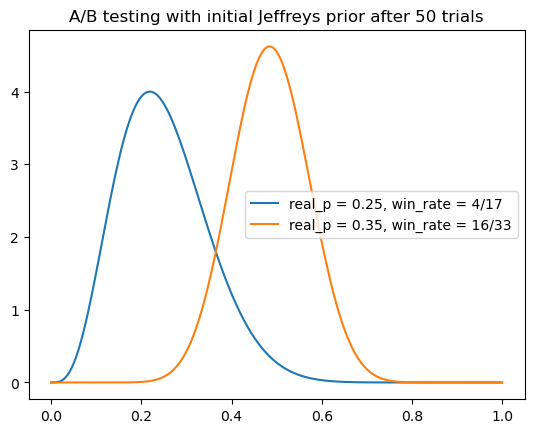

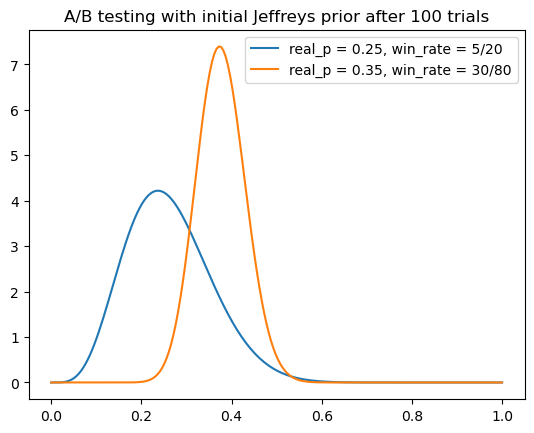

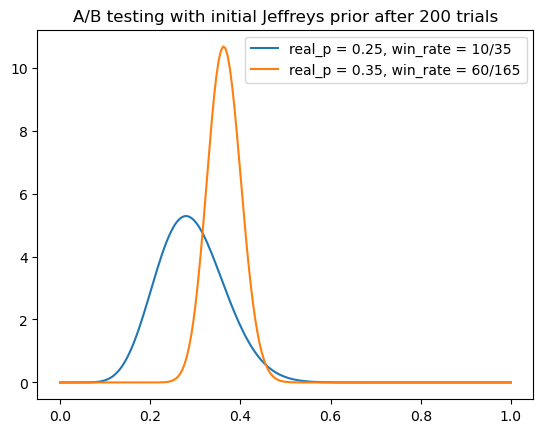

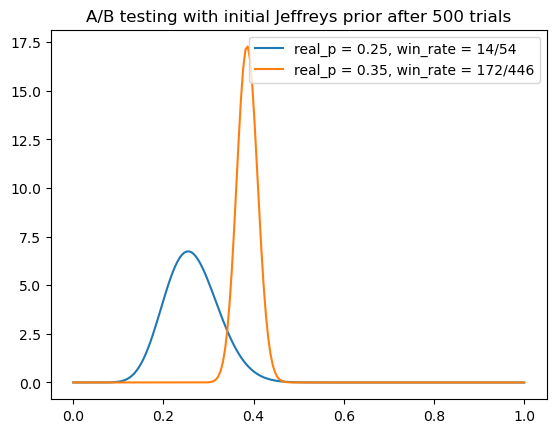

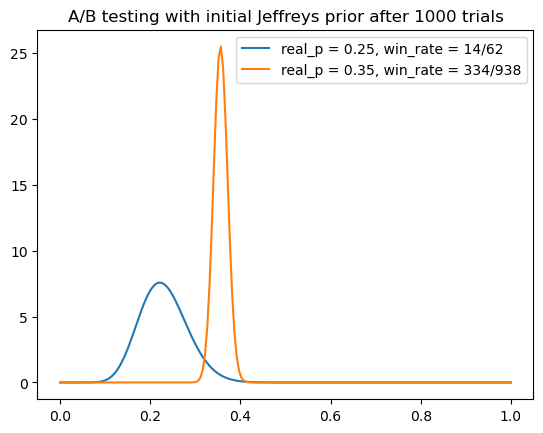

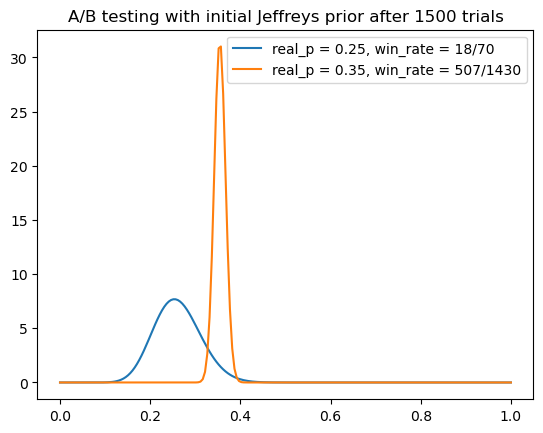

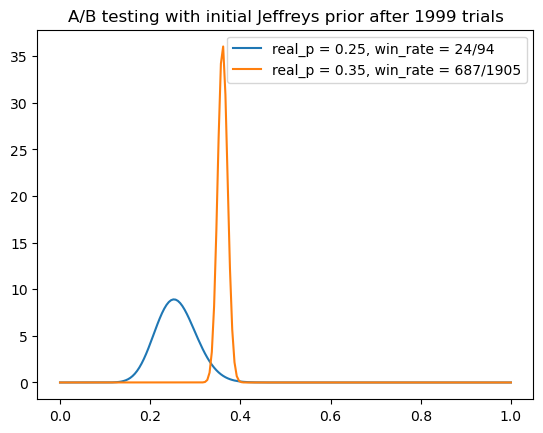

In [ ]:
bandits = [JeffreysBandit(p) for p in PROBABILITIES_BAND]
sample_points = [1, 5, 10, 25, 50, 100, 200, 500, 1000, 1500, 1999]
rewards = np.zeros(TRIALS)
for i in range(TRIALS):
    j = np.argmax([bandit.sample() for bandit in bandits])

    if i in sample_points:
        plot_jeffreys(bandits, i)

    x = bandits[j].pull()
    bandits[j].update(x)